In [97]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import collections 

In [93]:
def preprocess(text: str) -> list[str]:
  text = text.lower()
  text = text.replace('.',  ' <PERIOD> ')
  text = text.replace(',',  ' <COMMA> ')
  text = text.replace('"',  ' <QUOTATION_MARK> ')
  text = text.replace(';',  ' <SEMICOLON> ')
  text = text.replace('!',  ' <EXCLAMATION_MARK> ')
  text = text.replace('?',  ' <QUESTION_MARK> ')
  text = text.replace('(',  ' <LEFT_PAREN> ')
  text = text.replace(')',  ' <RIGHT_PAREN> ')
  text = text.replace('--', ' <HYPHENS> ')
  text = text.replace('?',  ' <QUESTION_MARK> ')
  text = text.replace(':',  ' <COLON> ')
  words = text.split()
  stats = collections.Counter(words)
  words = [word for word in words if stats[word] > 5]
  return words


In [5]:
dataset = load_dataset("ms_marco", "v1.1")

README.md:   0%|          | 0.00/9.48k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/175M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/10047 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/82326 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/9650 [00:00<?, ? examples/s]

In [21]:
print("Dataset Structure:")
print(dataset)

for split in dataset.keys():
    print(f"\n{split.capitalize()} split size: {len(dataset[split])} examples")



Dataset Structure:
DatasetDict({
    validation: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 10047
    })
    train: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 82326
    })
    test: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 9650
    })
})

Validation split size: 10047 examples

Train split size: 82326 examples

Test split size: 9650 examples


In [22]:
print("\nColumns in the dataset:")
for column in dataset['train'].features:
    print(f"- {column}: {dataset['train'].features[column]}")



Columns in the dataset:
- answers: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
- passages: Sequence(feature={'is_selected': Value(dtype='int32', id=None), 'passage_text': Value(dtype='string', id=None), 'url': Value(dtype='string', id=None)}, length=-1, id=None)
- query: Value(dtype='string', id=None)
- query_id: Value(dtype='int32', id=None)
- query_type: Value(dtype='string', id=None)
- wellFormedAnswers: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [90]:
df = pd.DataFrame(dataset['train']).sample(n=10000, random_state=42).reset_index()

In [92]:
df.head()

,index,answers,passages,query,query_id,query_type,wellFormedAnswers
0,54125,[On the southern border of Dora.],"{'is_selected': [0, 1, 0], 'passage_text': ['I...",where is burnwell ala,73880,location,[]
1,32584,[Connective tissue apart from blood and lymph ...,"{'is_selected': [0, 0, 0, 0, 0, 1, 0, 0, 0], '...",what constitutes connective tissue,52315,description,[]
2,9894,[$9.29 per hour to $15.08.],"{'is_selected': [0, 0, 1, 0], 'passage_text': ...",how much does a rehabilitation center employee...,29597,numeric,[]
3,3269,[Juvenile Caimans are yellow in color with bla...,"{'is_selected': [0, 0, 0, 0, 1, 0, 0, 0], 'pas...",what distinctive markings do caimans have,22968,entity,[]
4,23273,[Conus medullaris],"{'is_selected': [0, 0, 0, 0, 0, 0, 1, 0], 'pas...",at which vertebrae does the spinal cord end,42992,description,[]


In [70]:
def get_lengths(examples):
    query_lengths = [len(ex['query'].split()) for ex in examples]
    answer_lengths = [len(ex['answers'][0].split()) if ex['answers'] else 0 for ex in examples]
    passage_lengths = [len(ex['passages']['passage_text'][0].split()) for ex in examples]
    return query_lengths, answer_lengths, passage_lengths

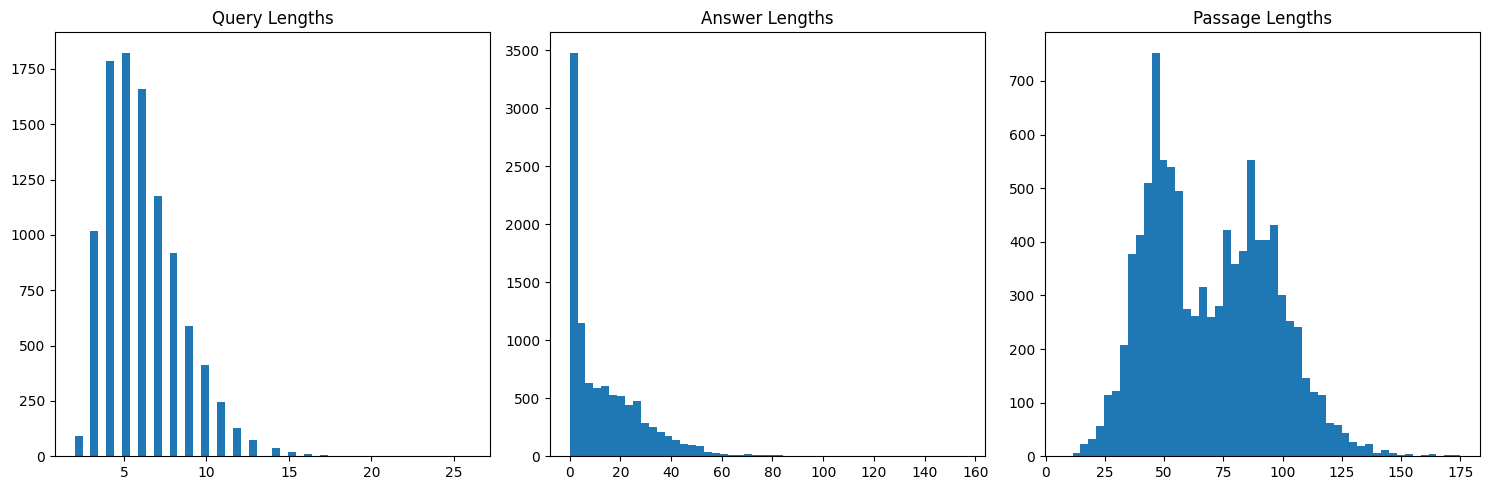

In [71]:

# Sample 10000 examples for faster processing
train_sample = dataset['train'].shuffle(seed=42).select(range(10000))
query_lengths, answer_lengths, passage_lengths = get_lengths(train_sample)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(query_lengths, bins=50)
plt.title('Query Lengths')
plt.subplot(132)
plt.hist(answer_lengths, bins=50)
plt.title('Answer Lengths')
plt.subplot(133)
plt.hist(passage_lengths, bins=50)
plt.title('Passage Lengths')
plt.tight_layout()
plt.show()

In [122]:
query_words = preprocess(' '.join(df['query']))
answer_words = preprocess(' '.join(df['answers'].apply(lambda x: x[0] if x else '')))
passage_words = preprocess(' '.join(df['passages'].apply(lambda x: x['passage_text'][0])))

In [123]:
df[len(df['answers']) == 0]

KeyError: False